# This is a project aimed at coming up wih an optimum kenyan market stock portfolio.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset
The dataset comprises of stocks from KCB,CENTUM AND NATION MEDIA.
The dataset was obtained from the NSE website

In [28]:
#Import the dataset
# When importing a file, use two foward slashes or a backward slash.
import pandas as pd

stocks = {}

KCB = pd.read_csv("C:\\Users\\user\\Downloads\\KCB.csv", parse_dates=['Date'], index_col='Date')
CTUM = pd.read_csv("C:\\Users\\user\\Downloads\\Centum.csv", parse_dates=['Date'], index_col='Date')
NM = pd.read_csv("C:\\Users\\user\\Downloads\\Nation Media Group.csv", parse_dates=['Date'], index_col='Date')

# Filter the data and select only the 'Close' column
KCB = KCB[[' Close']]
CTUM = CTUM[[' Close']]
NM = NM[[' Close']]

stocks['KCB'] = KCB
stocks['CTUM'] = CTUM
stocks['NM'] = NM

In [29]:
print("KCB:", stocks['KCB'].shape)
print("CTUM:", stocks['CTUM'].shape)
print("NM:", stocks['NM'].shape)

KCB: (310, 1)
CTUM: (310, 1)
NM: (310, 1)


In [30]:

# Combine the dataframes into a single dataframe
df.stocks = pd.concat([stocks[stock] for stock in stocks], axis=1, keys=stocks.keys())

# Display the combined dataframe
print(df.stocks)


              KCB   CTUM     NM
            Close  Close  Close
Date                           
2023-03-31  35.50   8.96  15.85
2023-03-30  35.00   8.72  15.55
2023-03-29  35.00   8.50  15.45
2023-03-28  35.00   8.42  15.00
2023-03-27  35.50   8.68  14.95
...           ...    ...    ...
2022-01-07  46.00  14.40  19.45
2022-01-06  45.90  14.50  19.90
2022-01-05  45.50  14.60  19.40
2022-01-04  45.05  14.80  20.00
2022-01-03  45.55  14.65  19.75

[310 rows x 3 columns]


# Log Returns
The data was converted from simple returns to log returns as it is easier to aggregate over time. 
This way, volatilty over time is easily detected.

In [33]:
#Calculating the log returns

stocks_returns = np.log(1 + df.stocks.pct_change())

print(stocks_returns)

                 KCB      CTUM        NM
               Close     Close     Close
Date                                    
2023-03-31       NaN       NaN       NaN
2023-03-30 -0.014185 -0.027151 -0.019109
2023-03-29  0.000000 -0.025553 -0.006452
2023-03-28  0.000000 -0.009456 -0.029559
2023-03-27  0.014185  0.030412 -0.003339
...              ...       ...       ...
2022-01-07 -0.008658  0.024606  0.018159
2022-01-06 -0.002176  0.006920  0.022873
2022-01-05 -0.008753  0.006873 -0.025447
2022-01-04 -0.009939  0.013606  0.030459
2022-01-03  0.011038 -0.010187 -0.012579

[310 rows x 3 columns]


# Portfolio Weights
The data is divided into weights randomly by use of np.zeros function.
The portfolio chosen is that of the highest sharpe ratio. 
This is the portfolio that will yield the highest returns given the risk undertaken.


In [39]:
#Portfolio Weights
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000 

weights_array = np.zeros((scenarios, len(stocks_returns.columns)))
weights_array

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [40]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [46]:
import random
np.random.seed(3)

for index in range(scenarios): 
    # Generate three random numbers for each index
    numbers = np.array(np.random.random(3))
    
    # Divide each number by the sum of the numbers to generate the random weight...also ensures the sum of the weights equals to 1.
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario(252 signifies the no. of weekdays in a year)
    returns_array[index] = np.sum(stocks_returns.mean() * 252 * weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stocks_returns.cov() * 252, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [50]:
sharpe_array

array([1.34005901, 1.19666623, 1.29899483, ..., 1.22680244, 1.16243282,
       1.05282143])

In [58]:
print("The highest sharpe ratio is:", sharpe_array.max())
print("The highest expected return is:", returns_array.max())
print("The highest volatility is:", volatility_array.max())

The highest sharpe ratio is: 1.370781972433002
The highest expected return is: 0.39289782842763304
The highest volatility is: 0.40004267155244383


In [52]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

248

In [70]:
#Return and Volatity of max sharpe ratio
print("The highest sharpe ratio is:", sharpe_array.max())
print("The expected return is:", returns_array[index_max_sharpe])
print("The volatility is:", volatility_array[index_max_sharpe])



The highest sharpe ratio is: 1.370781972433002
The expected return is: 0.27246496671451653
The volatility is: 0.19876608548543884


In [64]:
# Print the optimal weights for each stock
stocks_list = ['KCB', 'CTUM', 'NM']
print(stocks_list)
print(weights_array[index_max_sharpe,:])

['KCB', 'CTUM', 'NM']
[0.47332725 0.36897115 0.1577016 ]


# Data Visualization

This points out the efficient frontier which signifies the most efficient portfolio.
This portfolio gives the best returns for the risk being undertaken.

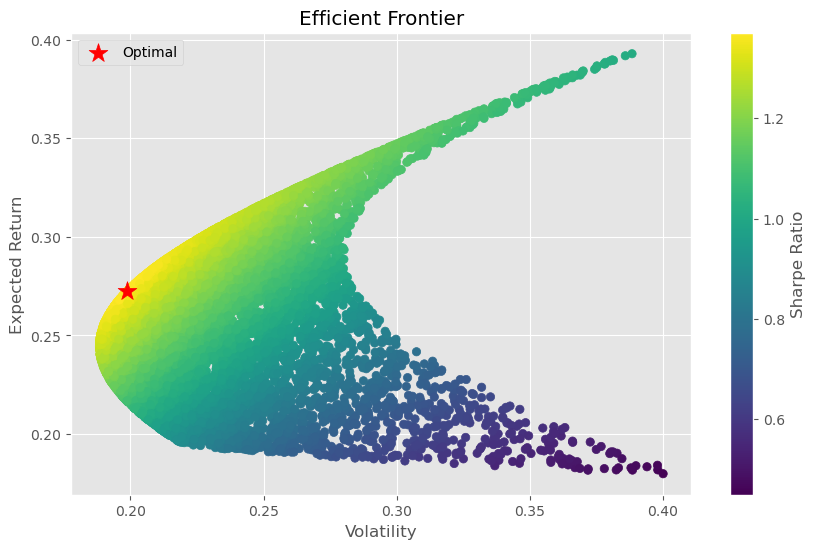

In [75]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]
# Visualize volatility vs returns for each scenario

plt.figure(figsize=(10,6))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, marker = '*', c='red', s = 200, label = 'Optimal');

plt.legend()
plt.show()

